In [1]:
import pandas as pd
import numpy as np

from src.LatentSpace import LatentSpace
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances



In [2]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_256dim_time_freq',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        latent_dims=256
                        )

Found 278326 files for Generator set


In [3]:
latent_space.load('data/autoencoder_256dim_time_freq_128k_10epochs/')

Loaded tracks.
Loaded artists.
Loaded genres.


In [4]:
latent_space.artists = latent_space.tracks.groupby(['artist_id','artist_name']).mean().reset_index()

In [5]:
latent_space.get_index_by_artist_name('Boy Harsher')

,track_id,track_name,artist_name
37784,13HYthybjhM3iyWcfl8VcN,Pain,Boy Harsher
102574,2ru0OaqYvJS8yXMMsZZWcH,Lost,Boy Harsher
180767,53Zvj4xbSFKwSJeXjyocHK,Fate,Boy Harsher
264525,7cIAp4QjtgR0Bxc0p5vfRl,Morphine,Boy Harsher


In [6]:
latent_space.get_similar_tracks_by_index(180767)

,index,track_name,artist_name,track_uri,similarity
0,180767,Fate,Boy Harsher,spotify:track:53Zvj4xbSFKwSJeXjyocHK,1.000000
1,265400,Angel Eyes - Dennis Kaito Remix,Escon,spotify:track:7dqzc1UbUXkLlQ9FHkUTjo,0.575403
2,273349,Frisch,01099,spotify:track:7rhfRaybfxTAjuzih3xWpc,0.573721
3,256991,Merlin - Original Mix,Frank Taurus,spotify:track:7C4SHk0XON8lChLqJ8dAQa,0.572649
4,112645,21-08-2011 - Original Mix,Aquilaganja,spotify:track:39PJWNo1DKgrn6NlNGknHV,0.554311
5,179106,Green - Alex Di Stefano Rmx,Federico Milani,spotify:track:50hKyAs2GZv0RiB88pwen4,0.542638
6,174895,Specialized In Love,Pierre de la Touche,spotify:track:4tLsw8GtDNb64AU1IvousY,0.541365
7,245764,Wicked Woman (Wax Motif Remix),fRew feat John Dubbs & Honorebel,spotify:track:6sIvzm7QsQXHmm94z9ebUd,0.541180
8,56942,Easy - Wash Hands Up Mix,Jazzy Lee,spotify:track:1atiyoFnNCBOAoSmIjYz8y,0.533478
9,180459,Bed Boi Pill,Marek Bois,spotify:track:533XQRZvNBMBSGYFnd2cdk,0.533299


In [7]:
seed = 180767

similar_artist_tracks = pd.DataFrame()
for artist_id in latent_space.get_similar_artists_by_index(seed, num=100).artist_id:
    similar_artist_tracks = pd.concat([similar_artist_tracks, latent_space.get_index_by_artist_id(artist_id)])
    
similar_artist_tracks = latent_space.tracks[latent_space.tracks.track_id.isin(similar_artist_tracks.track_id)]

similarity = cosine_similarity(np.array([latent_space.tracks.iloc[seed][latent_space.latent_cols]]), np.array(similar_artist_tracks[latent_space.latent_cols]))

similar_artist_tracks['similarity'] = similarity.T

most_similar = similar_artist_tracks.sort_values(by='similarity', ascending=False).reset_index()[:10]
most_similar[['track_uri','track_name','artist_name','artist_genres','similarity']]

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_10776/302612556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_artist_tracks['similarity'] = similarity.T


,track_uri,track_name,artist_name,artist_genres,similarity
0,spotify:track:53Zvj4xbSFKwSJeXjyocHK,Fate,Boy Harsher,"[dark post-punk, western mass indie]",1.000000
1,spotify:track:7C4SHk0XON8lChLqJ8dAQa,Merlin - Original Mix,Frank Taurus,[],0.572649
2,spotify:track:6sIvzm7QsQXHmm94z9ebUd,Wicked Woman (Wax Motif Remix),fRew feat John Dubbs & Honorebel,[],0.541180
3,spotify:track:1atiyoFnNCBOAoSmIjYz8y,Easy - Wash Hands Up Mix,Jazzy Lee,[lounge house],0.533478
4,spotify:track:533XQRZvNBMBSGYFnd2cdk,Bed Boi Pill,Marek Bois,"[german techno, minimal techno]",0.533299
5,spotify:track:71eCYCvhSIVTQkAqGRyrOI,Internet Love - Phunk Investigation Deep Remix,Houndogz,[],0.533112
6,spotify:track:2D6AokY4SHcFIY3NLqdMXI,I'm Easy - Dave Sinclair Club Extended,Jazzy Lee,[lounge house],0.526934
7,spotify:track:0YxNMBa8fTLu6GI6wuJzOI,08:08,Oliver Hacke,[],0.507051
8,spotify:track:6qPGFFuN38yhUU34f1NJVd,California Girls,Wutam & J-Break,[],0.501071
9,spotify:track:4ZYhM38B73PMFjCVLWuQ3o,Drei Haselnüsse,Jaques Raupé,[pop house],0.497969


In [21]:
latent_space.get_index_by_artist_name('Onyeabor')

,track_id,track_name,artist_name
38058,13oiVcrRczGhGVbWr38qdq,When the Going is Smooth & Good,William Onyeabor
44138,1ETZhP9orTkDclKEyt0xqm,Fantastic Man,William Onyeabor
58459,1dSFUmePLinKKFOmXaHDQu,Ride on Baby,William Onyeabor
122399,3QPbXJa0qz3hxAFCQO2hU0,Better Change Your Mind,William Onyeabor
145048,43q9SYFiYHMNgUDNzxm3WI,Body and Soul,William Onyeabor


In [30]:
latent_space.get_similar_tracks_by_index(145048, similarity_measure='cosine')

,index,track_name,artist_name,track_uri,similarity
0,145048,Body and Soul,William Onyeabor,spotify:track:43q9SYFiYHMNgUDNzxm3WI,1.000000
1,49391,If I Say So,Deadlyne,spotify:track:1NeofrTklg0kK5pGfoPVYn,0.412487
2,241587,7c 1020,Macc & dgoHn,spotify:track:6l9QFWdpLmSqVgzEjWrYIU,0.408981
3,130225,Nostalgic,Raul-Pablo Sanchez,spotify:track:3dozx8zI04jiRuFFNnOxAE,0.393753
4,262208,Bak to Lysende Øyne,Sort Vokter,spotify:track:7LDiMkTHirJQowCAjwJ6wh,0.383515
5,107148,Window (Actress Remix),Actress,spotify:track:2zpgZcT2Ec1zFCSMwv0UR1,0.380169
6,241074,Minnie The Moocher,Brothers Moving,spotify:track:6kIm6NejP3hxeccPGTr1NY,0.376152
7,28673,Don't Be So Fool,The Last Minister,spotify:track:0nrZqiKHQDHyrhsfqHPPSM,0.372149
8,131569,Ooh Do I Love You,Cap'n Jazz,spotify:track:3gEgqQth1OY9XkDmYX1U9F,0.360745
9,21408,Release,Christoph De Babalon,spotify:track:0b9VFwPRcv9ks1Oy0Mi3Cc,0.359196


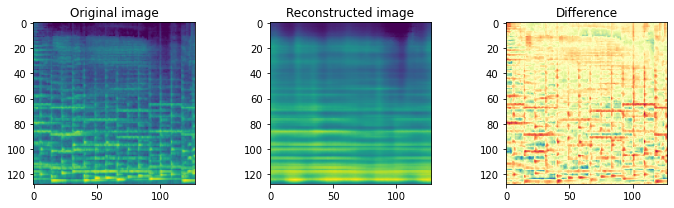

In [29]:
latent_space.plot_reconstruction(145048)

In [31]:
latent_space.get_similar_genres_by_index(145048)

,genre,similarity
0,old school hip hop,0.336843
1,rap,0.332772
2,funky breaks,0.321580
3,popping,0.304055
4,ukg revival,0.301877
5,freestyle,0.295861
6,tribal house,0.295148
7,samba de roda,0.292001
8,brazilian tech house,0.291730
9,pop r&b,0.291604


In [37]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

f = open('data/apikeys/.apikeys.json')
apikeys = json.load(f)
SPOTIPY_CLIENT_ID = apikeys['clientId']
SPOTIPY_CLIENT_SECRET = apikeys['clientSecret']

credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)

spotify = spotipy.Spotify(client_credentials_manager=credentials_manager)

In [36]:
spotify.search('King Khan and BBQ', type='artist')

{'artists': {'href': 'https://api.spotify.com/v1/search?query=King+Khan+and+BBQ&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4n0gvapwYbRpzU5Ov68B6P'},
    'followers': {'href': None, 'total': 71977},
    'genres': ['garage pop', 'garage rock', 'indie garage rock', 'punk blues'],
    'href': 'https://api.spotify.com/v1/artists/4n0gvapwYbRpzU5Ov68B6P',
    'id': '4n0gvapwYbRpzU5Ov68B6P',
    'images': [{'height': 1024,
      'url': 'https://i.scdn.co/image/c52c95c28cbf57a5b9b775789799bacadb915292',
      'width': 676},
     {'height': 969,
      'url': 'https://i.scdn.co/image/20f40cf0ae22fa149cad5e98f0425c7c172d7223',
      'width': 640},
     {'height': 303,
      'url': 'https://i.scdn.co/image/8b49004c0c7b87cc58a39d9730459c6a5b78a62b',
      'width': 200},
     {'height': 97,
      'url': 'https://i.scdn.co/image/5758184dfe8437560795f54c5ac803bdd7f83d3f',
      'width': 64}],
    'name': 'The King Khan & BBQ Show',
    'po

In [39]:
credentials_manager.get_access_token()

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_10776/2366778036.py:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  credentials_manager.get_access_token()


{'access_token': 'BQAlXANGQzMM_lzbBNxVz7buDM3UCtt9v7HFHCLlk38pim1jqlOliut3MLhgDgfejt7xILoxTrg3NZtPRed--9cUVa6kPlpBKklGV4B6iGH6zs2XzHY',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'expires_at': 1660951093}

In [ ]:
user_id = credentials_manager.client_id

endpoint_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

#need to understand how to get token